In [1]:
import json
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Path to the dataset
file_path = "data/Intent recognition/Data 2/Intent.json"

# Load the dataset
def load_dataset(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)
    return data

# Load the dataset
data = load_dataset(file_path)
print("Dataset loaded successfully!")

Dataset loaded successfully!


In [3]:
# Step 4: Clean and Preprocess the Text
def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^\w\s]", "", text)
    return text

def preprocess_dataset(data):
    processed_data = []
    for item in data["intents"]:
        intent = item["intent"]
        for text in item["text"]:
            cleaned_text = clean_text(text)
            processed_data.append({"text": cleaned_text, "intent": intent})
    return processed_data

processed_data = preprocess_dataset(data)
df = pd.DataFrame(processed_data)
print("Processed Dataset:")
print(df.head())

Processed Dataset:
          text    intent
0           hi  Greeting
1     hi there  Greeting
2         hola  Greeting
3        hello  Greeting
4  hello there  Greeting


In [11]:
# Save to CSV
df.to_csv("data/Intent recognition/Preprocessed data/D2.csv", index=False)
print("Processed dataset saved to 'processed_intent_dataset.csv'")

Processed dataset saved to 'processed_intent_dataset.csv'


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_29904\2111453584.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=intent_counts.index, y=intent_counts.values, palette="viridis")


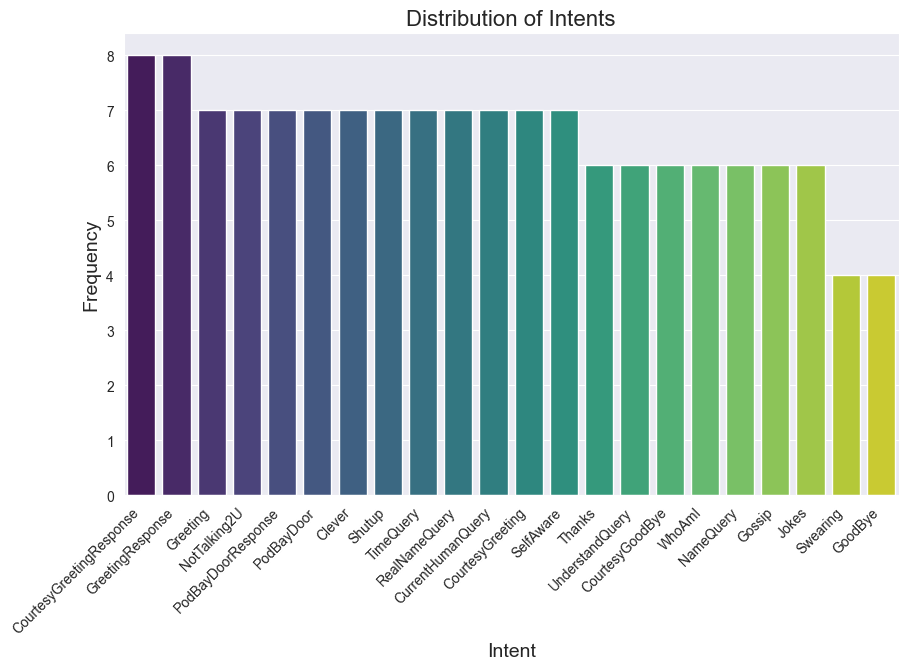

In [5]:
# Step 6: Visualize the Data
# 6.1: Distribution of Intents
intent_counts = df["intent"].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=intent_counts.index, y=intent_counts.values, palette="viridis")
plt.title("Distribution of Intents", fontsize=16)
plt.xlabel("Intent", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.show()


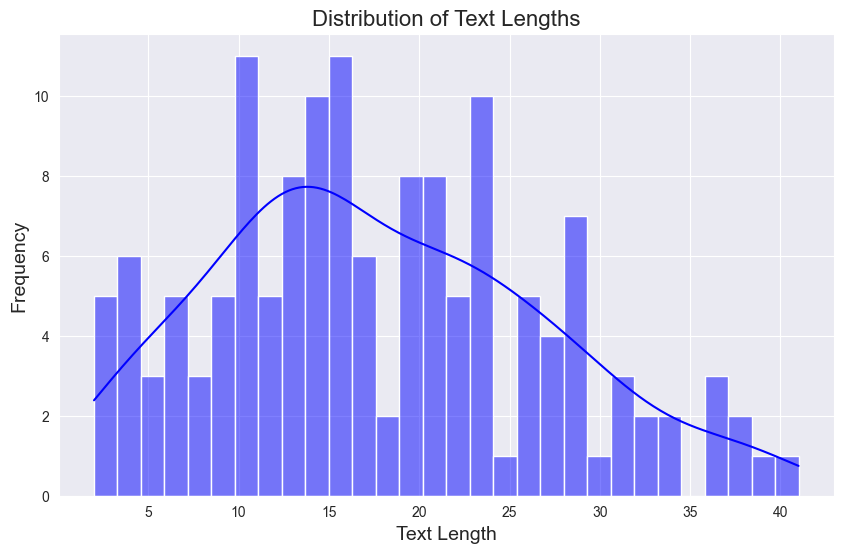

In [6]:
# 6.2: Calculate Text Lengths
df["text_length"] = df["text"].apply(len)

# Plot the distribution of text lengths
plt.figure(figsize=(10, 6))
sns.histplot(df["text_length"], bins=30, kde=True, color="blue")
plt.title("Distribution of Text Lengths", fontsize=16)
plt.xlabel("Text Length", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.show()

In [7]:
# Step 7: Summary of the Processed Dataset
print("Summary of the Processed Dataset:")
print(f"Total number of examples: {len(df)}")
print(f"Number of unique intents: {df['intent'].nunique()}")
print(f"Average text length: {df['text_length'].mean():.2f} characters")

Summary of the Processed Dataset:
Total number of examples: 143
Number of unique intents: 22
Average text length: 17.75 characters


In [9]:
dataset = pd.read_csv("data/Intent recognition/Data 2/processed_intent_dataset.csv")

In [10]:
dataset

,text,intent
0,hi,Greeting
1,hi there,Greeting
2,hola,Greeting
3,hello,Greeting
4,hello there,Greeting
...,...,...
138,can you prove you have a conscious,SelfAware
139,can you prove you are selfaware please,SelfAware
140,can you prove you are self aware please,SelfAware
141,can you prove you have a conscious please,SelfAware
